In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from math import *

In [3]:
#Differential Evolution Algorithm

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    #pop: intialize random populatation
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]
        
#yield is used in order to support last step of iteration
#more details at https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do  

In [4]:
f_bias = [-450.0 , -450 , 390 , -330 , -180 , -140]

In [5]:
# initial guesses
n = 500
#x0 = np.zeros(n)
x0 = np.zeros(n)
dim =np.arange(0,500, 1).tolist()

In [6]:
################################
#### 5. Shifted_Griewank #######
################################

def Shifted_Griewank(x):
    F1 = 0
    F2 = 0
    for i in range(len(x)):     
        F1 = F1 + ( (x[i]**2) / 4000 )
        F2 = F2 * ( cos(x[i]/sqrt(i+1)))       
    return F1 - F2 + 1 + f_bias[4]

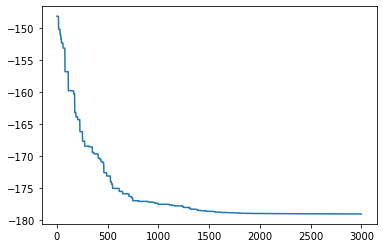

In [7]:
#Running the optmization for D=50
Dim = 50
result_D50 = list(de(Shifted_Griewank, bounds=[(-100, 100)] * Dim , its=3000))

# plot the convergence over time
import matplotlib.pyplot as plt
x, f = zip(*result_D50)
plt.plot(f)

In [8]:
ya= result_D50[-1]
ya[1]

-178.99674507404092

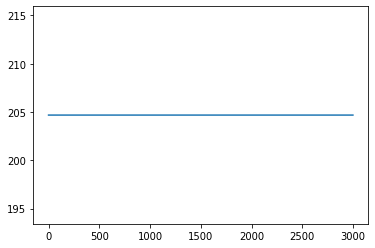

In [9]:
#Running the optmization for D=50
Dim = 500
result_D500 = list(de(Shifted_Griewank, bounds=[(-100, 100)] * Dim , its=3000))

# plot the convergence over time
x, f = zip(*result_D500)

plt.plot(f)